# Import Library

In [1]:
!pip install opendatasets
import pandas as pd
import numpy as np
import opendatasets as od
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
od.download("https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system?select=movies.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andresaputraginting
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system


100%|██████████| 846k/846k [00:00<00:00, 439MB/s]

In [3]:
movies = pd.read_csv("/content/movies-and-ratings-for-recommendation-system/movies.csv")
ratings = pd.read_csv("/content/movies-and-ratings-for-recommendation-system/ratings.csv")

# Data Understanding

## Movies Dataset

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# List untuk menyimpan ringkasan per kolom
list_of_descs = []

# Menggunakan dataframe 'movies' sebagai contoh, ganti dengan 'ratings' jika perlu
for col in movies.columns:
    col_type = movies[col].dtype
    total_row = movies.shape[0]
    null_count = movies[col].isna().sum()
    null_pct = round((null_count / total_row) * 100, 2)
    unique_count = movies[col].nunique()
    sample_unique = movies[col].unique()

    list_of_descs.append([
        col,
        col_type,
        total_row,
        null_count,
        null_pct,
        unique_count,
        sample_unique
    ])

# Buat dataframe ringkasan
df_desc = pd.DataFrame(
    list_of_descs,
    columns=[
        'Column',
        'Type',
        'Total Rows',
        'Null Count',
        'Null %',
        'Unique Values',
        'Sample Unique Values'
    ]
)

# Tampilkan ringkasan
df_desc

,Column,Type,Total Rows,Null Count,Null %,Unique Values,Sample Unique Values
0,movieId,int64,9742,0,0.0,9742,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,title,object,9742,0,0.0,9737,"[Toy Story (1995), Jumanji (1995), Grumpier Ol..."
2,genres,object,9742,0,0.0,951,"[Adventure|Animation|Children|Comedy|Fantasy, ..."


### 📝 Ringkasan Dataset `movies.csv`

* **movieId** (`int64`)
  → ID unik film, total 9742, **tidak ada duplikat atau null**.

* **title** (`object`)
  → Judul film, ada **5 duplikat judul** (9737 unik dari 9742), **tidak ada null**.

* **genres** (`object`)
  → Gabungan genre (dipisah `|`), total **951 kombinasi unik**, **tidak ada null**.


In [106]:
# Cek duplikasi pada kolom 'title' di dataframe 'movies'
duplicate_titles = movies[movies.duplicated(subset=['title'], keep=False)]

# Tampilkan baris yang mengandung duplikasi pada kolom 'title'
if not duplicate_titles.empty:
  print("Baris dengan judul duplikat:")
  print(duplicate_titles.sort_values(by='title'))
else:
  print("Tidak ada judul duplikat dalam dataset movies.")

Baris dengan judul duplikat:
      movieId                                   title  \
4169     6003  Confessions of a Dangerous Mind (2002)   
9106   144606  Confessions of a Dangerous Mind (2002)   
650       838                             Emma (1996)   
5601    26958                             Emma (1996)   
5854    32600                             Eros (2004)   
9135   147002                             Eros (2004)   
2141     2851                         Saturn 3 (1980)   
9468   168358                         Saturn 3 (1980)   
5931    34048                War of the Worlds (2005)   
6932    64997                War of the Worlds (2005)   

                                   genres  
4169          Comedy|Crime|Drama|Thriller  
9106  Comedy|Crime|Drama|Romance|Thriller  
650                  Comedy|Drama|Romance  
5601                              Romance  
5854                                Drama  
9135                        Drama|Romance  
2141            Adventure|Sci-Fi|Th

Terlihat bahwa Judulnya sama namun genrenya berbeda jadi tidak 100% duplikat

## Ratings Dataset

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
# List untuk menyimpan ringkasan per kolom
list_of_descs = []

# Menggunakan dataframe 'ratings'
for col in ratings.columns:
    col_type = ratings[col].dtype
    total_row = ratings.shape[0]
    null_count = ratings[col].isna().sum()
    null_pct = round((null_count / total_row) * 100, 2)
    unique_count = ratings[col].nunique()
    sample_unique = ratings[col].unique()

    list_of_descs.append([
        col,
        col_type,
        total_row,
        null_count,
        null_pct,
        unique_count,
        sample_unique
    ])

# Buat dataframe ringkasan
df_desc = pd.DataFrame(
    list_of_descs,
    columns=[
        'Column',
        'Type',
        'Total Rows',
        'Null Count',
        'Null %',
        'Unique Values',
        'Sample Unique Values'
    ]
)

# Tampilkan ringkasan
df_desc

,Column,Type,Total Rows,Null Count,Null %,Unique Values,Sample Unique Values
0,userId,int64,100836,0,0.0,610,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,movieId,int64,100836,0,0.0,9724,"[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,..."
2,rating,float64,100836,0,0.0,10,"[4.0, 5.0, 3.0, 2.0, 1.0, 4.5, 3.5, 2.5, 0.5, ..."
3,timestamp,int64,100836,0,0.0,85043,"[964982703, 964981247, 964982224, 964983815, 9..."


### 📝 Ringkasan Dataset `ratings.csv`

* **userId** (`int64`)
  → ID unik pengguna, total 100,836 baris, **610 user unik**, **tidak ada null**.

* **movieId** (`int64`)
  → ID unik film, total 100,836 baris, **9,724 film unik**, **tidak ada null**.

* **rating** (`float64`)
  → Nilai rating film (skala 0.5–5.0), total 10 nilai berbeda, **tidak ada null**.

* **timestamp** (`int64`)
  → Waktu rating dalam format epoch, total 85,043 nilai unik, **tidak ada null**.


# Data Preprocessing

## Merge Data `movies` dan `ratings`

In [8]:
df_merge = pd.merge(movies, ratings, on='movieId',  how='left')
df_merge.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


## Menghapus kolom `timestamp`

In [9]:
df_merge = df_merge.drop('timestamp', axis=1)
df_merge.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5


menghapus kolom `timestamp` karena tidak digunakan

## Mengatasi Missing Values

In [10]:
df_merge.isna().sum()

,0
movieId,0
title,0
genres,0
userId,18
rating,18


Data tersebut menunjukkan adanya **missing values** atau nilai yang hilang di beberapa kolom, yaitu:

* Kolom `userId` memiliki 18 nilai kosong.
* Kolom `rating` juga memiliki 18 nilai kosong.
* Sedangkan kolom `movieId`, `title`, dan `genres` tidak memiliki nilai kosong sama sekali.

### Menghapus Missing Values

In [11]:
# Drop rows with missing values
df_merge.dropna(inplace=True)

# Verify that missing values have been removed
df_merge.isna().sum()

,0
movieId,0
title,0
genres,0
userId,0
rating,0


## Mengatasi data duplikat

In [12]:
print(f'Jumlah data duplikat: ', df_merge.duplicated().sum())

Jumlah data duplikat:  0


## Menghapus Simbol pada kolom `title` dan `genres`

In [13]:
df_merge['title'] = df_merge['title'].str.replace(r"\((\d{4})\)", r"\1", regex=True)
df_merge['genres'] = df_merge['genres'].str.split('|')

In [18]:
print(df_merge.head())

   movieId           title                                             genres  \
0        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   
1        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   
2        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   
3        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   
4        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   

   userId  rating  
0     1.0     4.0  
1     5.0     4.0  
2     7.0     4.5  
3    15.0     2.5  
4    17.0     4.5  


menghapus simbol `|` agar bisa digunakan untuk tahap selanjutnya

In [17]:
# Membuat list untuk menyimpan genre yang unik
all_genres = []

# Iterasi melalui setiap baris dataframe
for index, row in df_merge.iterrows():
    # Periksa apakah nilai di kolom 'genres' adalah list
    if isinstance(row['genres'], list):
        # Tambahkan setiap genre dalam list ke list all_genres
        all_genres.extend(row['genres'])
    else:
        if pd.notna(row['genres']): # Pastikan bukan NaN
            all_genres.append(row['genres'])


# Mengubah list menjadi set untuk mendapatkan genre yang unik
unique_genres = set(all_genres)

# Menampilkan jenis unique genres
print("Jenis unique genres:")
for genre in unique_genres:
    print(genre)

print(f'\nJumlah unique genres:', len(unique_genres))

Jenis unique genres:
IMAX
Western
Animation
Action
Thriller
Crime
Horror
Documentary
Sci-Fi
Drama
Adventure
Fantasy
Comedy
(no genres listed)
Musical
Film-Noir
Mystery
Children
Romance
War

Jumlah unique genres: 20


### Menghapus data pada kolom `title` yang tidak memiliki genre

In [19]:
df_merge = df_merge[df_merge['genres'].apply(lambda x: '(no genres listed)' not in x)]

print(f'Jumlah baris setelah menghapus data dengan "no genres listed":', len(df_merge))
print(df_merge.head())

Jumlah baris setelah menghapus data dengan "no genres listed": 100789
   movieId           title                                             genres  \
0        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   
1        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   
2        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   
3        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   
4        1  Toy Story 1995  [Adventure, Animation, Children, Comedy, Fantasy]   

   userId  rating  
0     1.0     4.0  
1     5.0     4.0  
2     7.0     4.5  
3    15.0     2.5  
4    17.0     4.5  


In [20]:
print("\nJumlah nilai unique pada kolom 'rating' dan jumlahnya:")
print(ratings['rating'].value_counts())


Jumlah nilai unique pada kolom 'rating' dan jumlahnya:
rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64


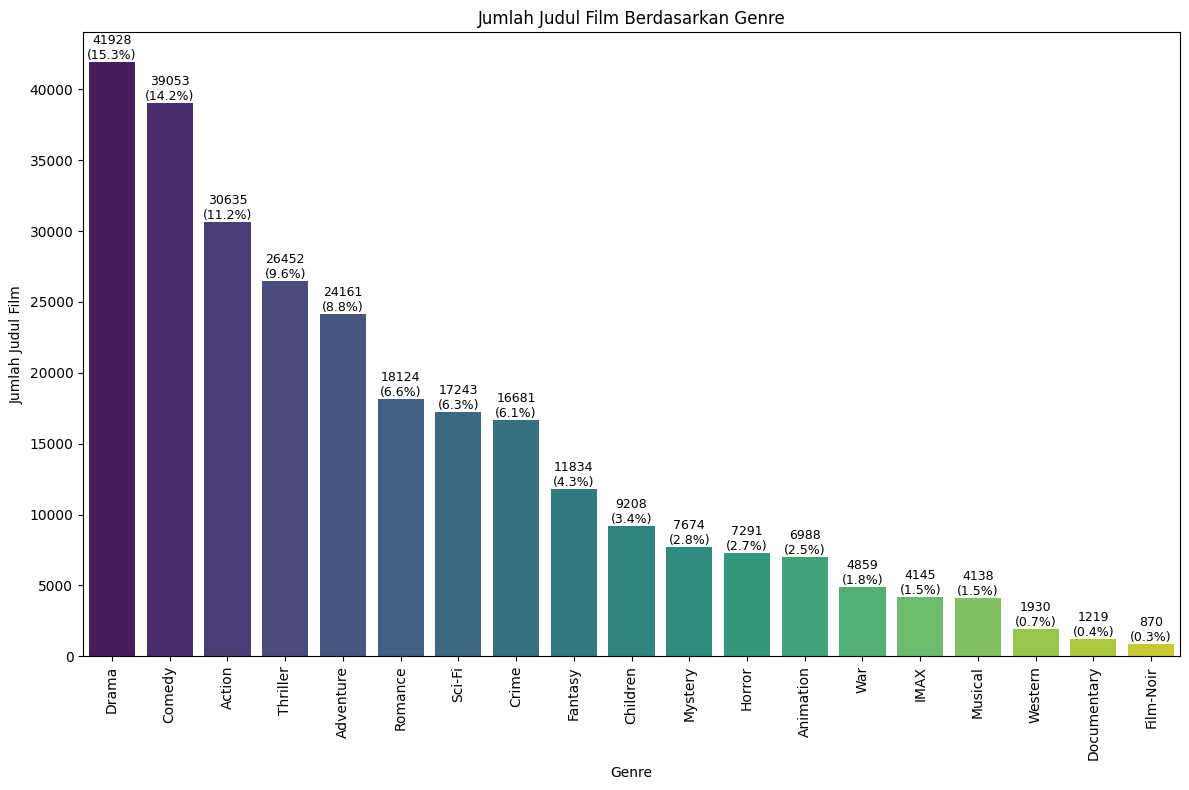

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Explode kolom genres agar satu genre per baris
genres_exploded = df_merge.explode('genres')

# Hitung jumlah film per genre
genre_counts = genres_exploded['genres'].value_counts()

# Ambil top 20 genre
top_genres = genre_counts.head(20)
total_count = genre_counts.sum()  # total semua genre (bisa lebih dari jumlah film karena multi-genre)

# Buat DataFrame
top_genres_df = top_genres.reset_index()
top_genres_df.columns = ['Genre', 'Count']

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_genres_df, x='Genre', y='Count', hue='Genre', palette='viridis', legend=False)

# Tambahkan label jumlah dan persentase di atas batang
for i, row in top_genres_df.iterrows():
    count = row['Count']
    percent = (count / total_count) * 100
    ax.text(i, count + 1, f'{count}\n({percent:.1f}%)', ha='center', va='bottom', fontsize=9)

# Styling
plt.title('Jumlah Judul Film Berdasarkan Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah Judul Film')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Hasil Visualisasi


* **Genre Drama** merupakan genre yang paling banyak muncul, dengan **41.928 judul film** atau sekitar **15,3%** dari total keseluruhan.
* Diikuti oleh **Comedy (14,2%)**, **Action (11,2%)**, dan **Thriller (9,6%)**, yang juga memiliki jumlah film yang cukup tinggi.
* Genre seperti **Western, Documentary, dan Film-Noir** memiliki jumlah film yang jauh lebih sedikit, masing-masing hanya **0,7%**, **0,4%**, dan **0,3%** dari total.

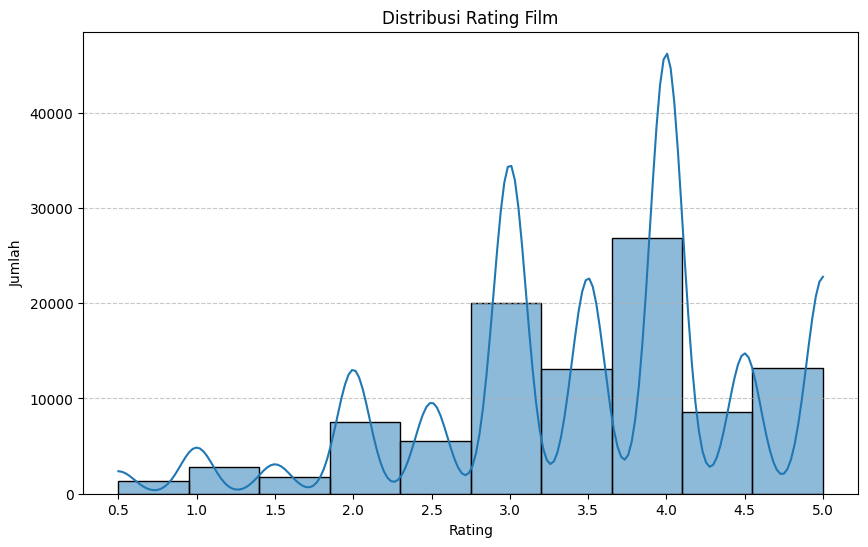

In [22]:
# Visualisasi Distribusi Rating
plt.figure(figsize=(10, 6))
sns.histplot(df_merge['rating'], bins=10, kde=True)
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(np.arange(0.5, 5.5, 0.5)) # Set ticks every 0.5 unit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Hasil Visualisasi

* Rating paling banyak diberikan adalah **4.0**, disusul oleh **3.5 dan 5.0**, yang artinya sebagian besar pengguna memberikan rating positif terhadap film.
* Jumlah rating yang sangat rendah seperti **0.5 hingga 1.5** relatif jarang diberikan.
* Pola distribusinya agak **condong ke kanan (positif skewed)**, menunjukkan kecenderungan pengguna untuk memberi rating tinggi daripada rendah.

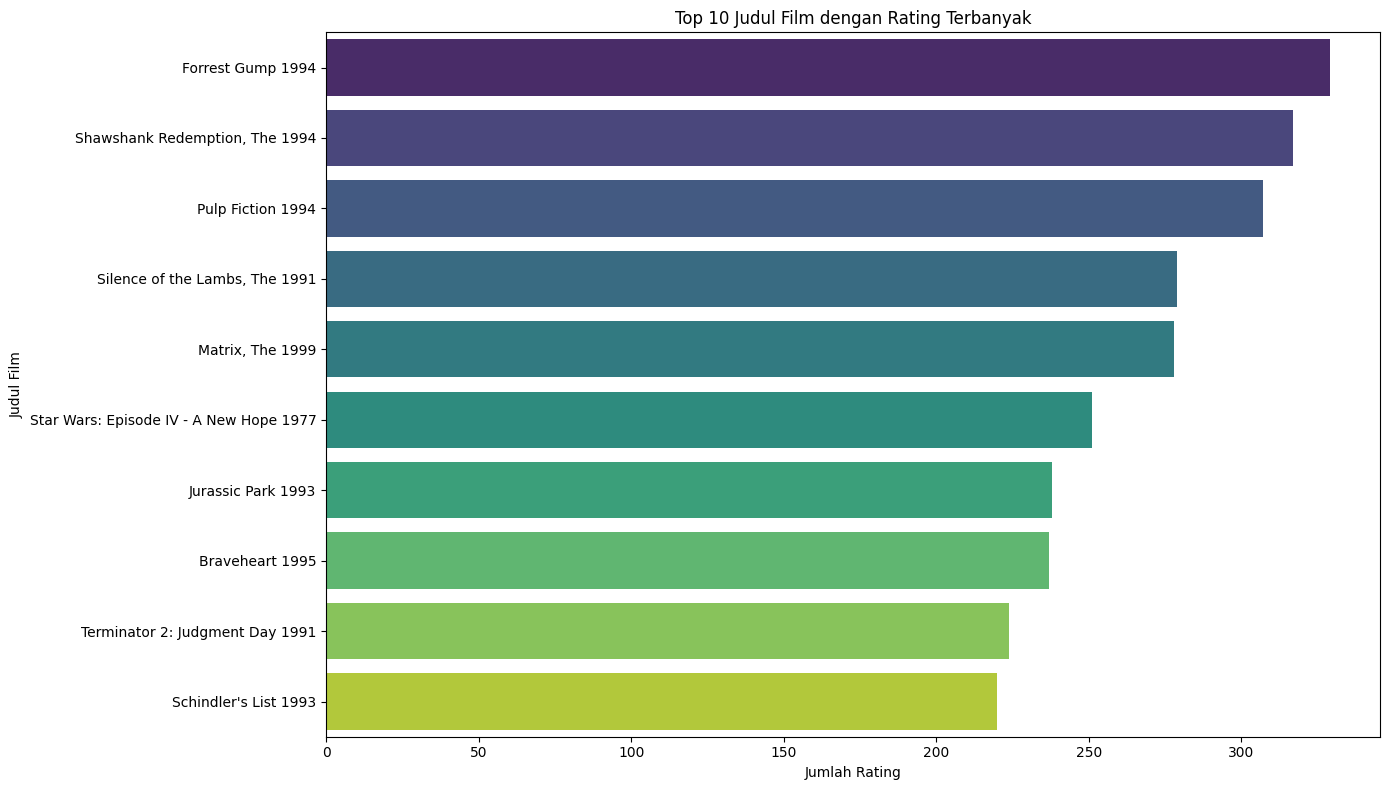

In [24]:
# Hitung jumlah rating per judul film
rating_counts_per_title = df_merge['title'].value_counts()

# Ambil 10 judul dengan rating terbanyak
top_10_rated_titles = rating_counts_per_title.head(10)

# Buat DataFrame dari top 10 judul
top_10_rated_titles_df = top_10_rated_titles.reset_index()
top_10_rated_titles_df.columns = ['Title', 'Number of Ratings']

# Visualisasi
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_rated_titles_df, x='Number of Ratings', y='Title', hue='Title', palette='viridis', legend=False)
plt.title('Top 10 Judul Film dengan Rating Terbanyak')
plt.xlabel('Jumlah Rating')
plt.ylabel('Judul Film')
plt.tight_layout()
plt.show()

Hasil Visualisasi:

* **Forrest Gump (1994)** menjadi film dengan **jumlah rating terbanyak**, disusul oleh **The Shawshank Redemption (1994)** dan **Pulp Fiction (1994)**.
* Film-film yang masuk dalam daftar ini sebagian besar merupakan **film klasik populer dari tahun 1990-an**, menunjukkan bahwa film-film era tersebut sangat populer dan banyak ditonton.
* Semua film yang ditampilkan memiliki jumlah rating di atas 200, menunjukkan tingkat keterlibatan pengguna yang tinggi terhadap judul-judul tersebut.


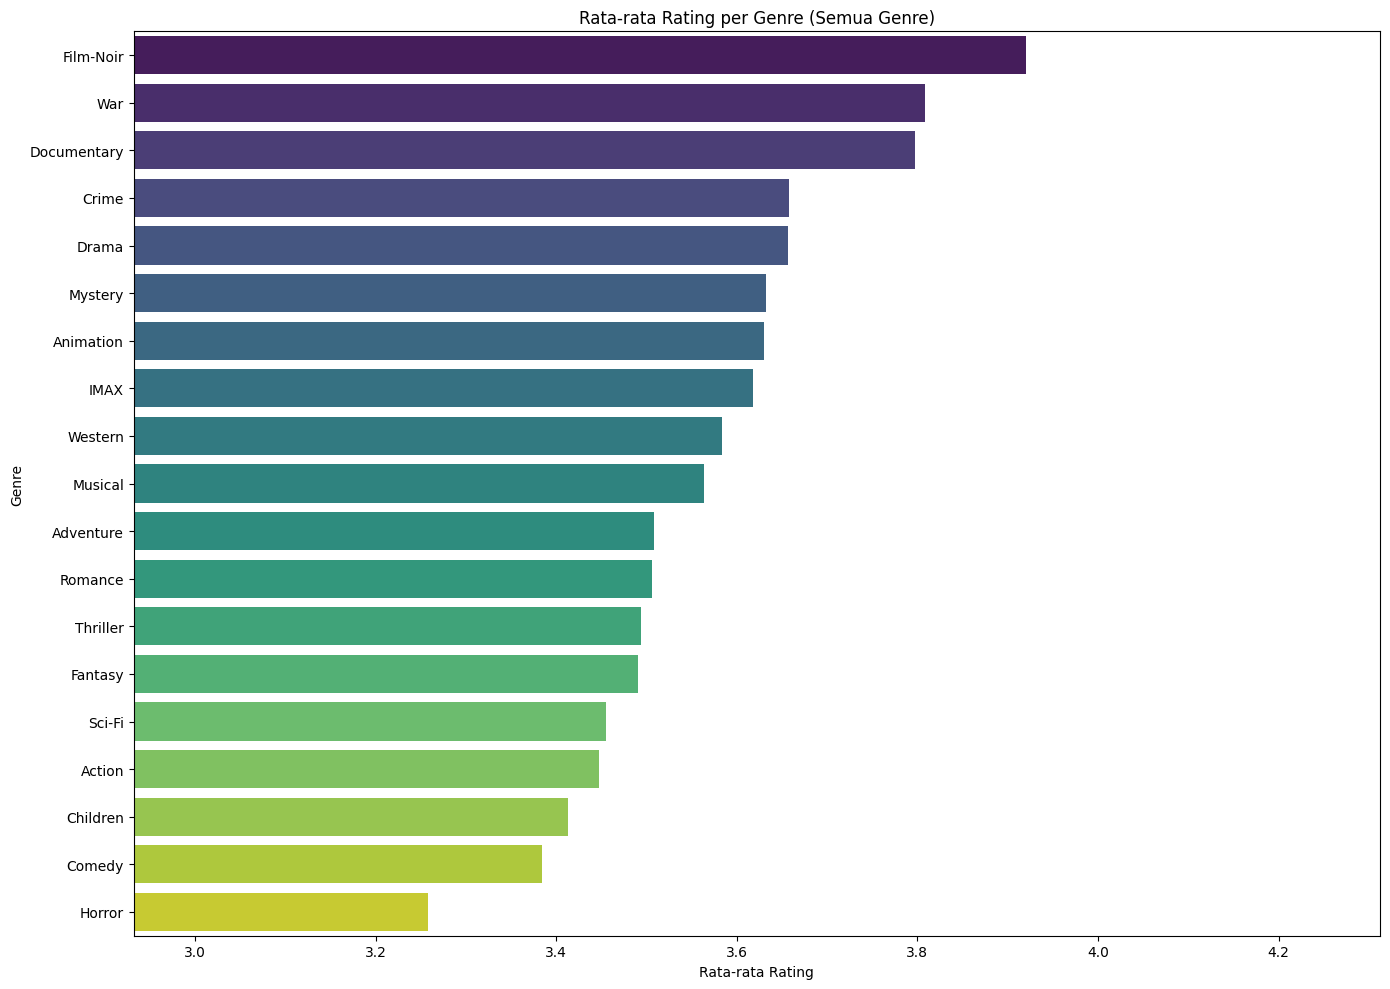

In [25]:
# Visualisasi Rata-rata Rating per Genre (Semua Genre)
# Hitung rata-rata rating per genre
average_rating_per_genre = genres_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Konversi ke DataFrame untuk visualisasi
average_rating_df = average_rating_per_genre.reset_index()
average_rating_df.columns = ['Genre', 'Average Rating']

plt.figure(figsize=(14, 10)) # Adjust figure size for more genres
sns.barplot(data=average_rating_df, x='Average Rating', y='Genre', hue='Genre', palette='viridis', legend=False)
plt.title('Rata-rata Rating per Genre (Semua Genre)')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Genre')
# Optional: Adjust x-axis limits if needed
plt.xlim(average_rating_df['Average Rating'].min() * 0.9, average_rating_df['Average Rating'].max() * 1.1)
plt.tight_layout()
plt.show()

Hasil Visualisasi:

1. **Genre dengan Rata-Rata Rating Tertinggi**:

   * **Film-Noir** memiliki rating rata-rata tertinggi, di atas 4.0, menunjukkan bahwa meskipun mungkin tidak banyak film bergenre ini, kualitasnya dinilai sangat baik oleh penonton.
   * Diikuti oleh **War** dan **Documentary**, yang juga memiliki rating tinggi — ini bisa menunjukkan preferensi penonton terhadap film dengan nilai sejarah, realisme, atau konten mendalam.

2. **Genre Populer dengan Rating Sedang**:

   * Genre seperti **Drama**, **Crime**, **Mystery**, dan **Animation** memiliki rating rata-rata yang baik (sekitar 3.6–3.7), yang menunjukkan kualitas rata-rata film cukup tinggi dan sering diminati.

3. **Genre dengan Rata-Rata Rating Terendah**:

   * **Horror** berada di posisi terbawah dengan rating rata-rata terendah (sekitar 3.3), disusul oleh **Comedy** dan **Children**.
   * Hal ini bisa mengindikasikan bahwa film horor dan komedi cenderung lebih bervariasi dalam kualitas (ada yang bagus, banyak juga yang dinilai rendah), atau mungkin tidak semua penonton menyukai genre tersebut.


In [26]:
df_merge

,movieId,title,genres,userId,rating
0,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,4.0
1,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]",5.0,4.0
2,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]",7.0,4.5
3,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]",15.0,2.5
4,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]",17.0,4.5
...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic 2017,"[Action, Animation, Comedy, Fantasy]",184.0,4.0
100850,193583,No Game No Life: Zero 2017,"[Animation, Comedy, Fantasy]",184.0,3.5
100851,193585,Flint 2017,[Drama],184.0,3.5
100852,193587,Bungo Stray Dogs: Dead Apple 2018,"[Action, Animation]",184.0,3.5


## Content Based Filtering

In [27]:
df_cbf = df_merge[['movieId', 'title', 'genres']]
df_cbf.head()

,movieId,title,genres
0,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
3,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
4,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"


### Prepocessing Data for Content Based Filtering

In [29]:
# Convert the list of genres back to a string representation for hashing
df_cbf['genres_str'] = df_cbf['genres'].apply(lambda x: '|'.join(x))

# Drop duplicates using the new string column and the title column
df_cbf = df_cbf.drop_duplicates(subset=['title', 'genres_str'])

# You can drop the temporary 'genres_str' column if you no longer need it
df_cbf = df_cbf.drop('genres_str', axis=1)

print("Jumlah baris setelah menghapus duplikat:", len(df_cbf))
df_cbf.head()

Jumlah baris setelah menghapus duplikat: 9690


,movieId,title,genres
0,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]"
215,2,Jumanji 1995,"[Adventure, Children, Fantasy]"
325,3,Grumpier Old Men 1995,"[Comedy, Romance]"
377,4,Waiting to Exhale 1995,"[Comedy, Drama, Romance]"
384,5,Father of the Bride Part II 1995,[Comedy]


### TF-IDF Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Convert the list of genres into a single string separated by spaces
# This makes the 'genres' column suitable for TfidfVectorizer
df_cbf['genres_string'] = df_cbf['genres'].apply(lambda x: ' '.join(x))

# Fit the TfidfVectorizer on the new string column
tf.fit(df_cbf['genres_string'])

# You can keep the original 'genres' list column or drop it if not needed later
# df_cbf = df_cbf.drop('genres', axis=1)

tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

In [31]:
df_cbf

,movieId,title,genres,genres_string
0,1,Toy Story 1995,"[Adventure, Animation, Children, Comedy, Fantasy]",Adventure Animation Children Comedy Fantasy
215,2,Jumanji 1995,"[Adventure, Children, Fantasy]",Adventure Children Fantasy
325,3,Grumpier Old Men 1995,"[Comedy, Romance]",Comedy Romance
377,4,Waiting to Exhale 1995,"[Comedy, Drama, Romance]",Comedy Drama Romance
384,5,Father of the Bride Part II 1995,[Comedy],Comedy
...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic 2017,"[Action, Animation, Comedy, Fantasy]",Action Animation Comedy Fantasy
100850,193583,No Game No Life: Zero 2017,"[Animation, Comedy, Fantasy]",Animation Comedy Fantasy
100851,193585,Flint 2017,[Drama],Drama
100852,193587,Bungo Stray Dogs: Dead Apple 2018,"[Action, Animation]",Action Animation


### Menghapus Kolom `genres`

In [32]:
df_cbf = df_cbf.drop('genres', axis=1)
df_cbf.head()

,movieId,title,genres_string
0,1,Toy Story 1995,Adventure Animation Children Comedy Fantasy
215,2,Jumanji 1995,Adventure Children Fantasy
325,3,Grumpier Old Men 1995,Comedy Romance
377,4,Waiting to Exhale 1995,Comedy Drama Romance
384,5,Father of the Bride Part II 1995,Comedy


In [33]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df_cbf['genres_string'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9690, 21)

In [34]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.41677501, 0.51640289, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.5122897 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57821416, 0.        , 0.81588503, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [35]:
# Membuat dataframe untuk melihat tf-idf matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=df_cbf.title
).sample(21, axis=1).sample(10, axis=0)

,war,western,musical,comedy,film,documentary,horror,fantasy,noir,imax,...,crime,children,sci,action,thriller,romance,drama,fi,adventure,animation
title,,,,,,,,,,,,,,,,,,,,,
Le Maître d'école 1981,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
"Quick and the Dead, The 1995",0.0,0.803196,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.423832,0.418620,0.0,0.000000,0.0,0.000000,0.0
"Happiness of the Katakuris, The (Katakuri-ke no kôfuku) 2001",0.0,0.000000,0.752169,0.335525,0.0,0.0,0.567155,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
Avalanche 1978,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
No Mercy 1986,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.636175,0.0,0.0,0.548930,0.542179,0.0,0.000000,0.0,0.000000,0.0
Friday 1995,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
"Emerald Forest, The 1985",0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.602718,0.000000,0.0,0.406949,0.0,0.686384,0.0
Red Riding Hood 2011,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.491911,0.52589,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.393509,0.0,0.000000,0.0,0.000000,0.0
"Fast and the Furious: Tokyo Drift, The (Fast and the Furious 3, The) 2006",0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,...,0.596521,0.0,0.0,0.514714,0.508384,0.0,0.347530,0.0,0.000000,0.0


### Cosine Similarity

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim # Display the result

array([[1.        , 0.81355337, 0.15245713, ..., 0.        , 0.42132539,
        0.26731811],
       [0.81355337, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15245713, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57032099],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42132539, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26731811, 0.        , 0.57032099, ..., 0.        , 0.        ,
        1.        ]])

In [37]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama title
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_cbf['title'], columns=df_cbf['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap title
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9690, 9690)


title,Lucky Break 2001,Invincible 2001,Trust 1990,Just Eat It: A Food Waste Story 2014,Shakespeare in Love 1998
title,,,,,
Hope and Glory 1987,0.000000,1.000000,0.466351,0.0,0.466351
National Lampoon's Senior Trip 1995,0.533196,0.000000,0.504506,0.0,0.504506
Weirdsville 2007,0.896971,0.442090,0.447455,0.0,0.447455
Trekkies 1997,0.000000,0.000000,0.000000,1.0,0.000000
Tom and Jerry: Shiver Me Whiskers 2006,0.185102,0.000000,0.175142,0.0,0.175142
Pete's Dragon 1977,0.000000,0.000000,0.000000,0.0,0.000000
Paul Blart: Mall Cop 2 2015,0.807697,0.000000,0.217271,0.0,0.217271
Blackboard Jungle 1955,0.000000,1.000000,0.466351,0.0,0.466351
Fun with Dick and Jane 2005,1.000000,0.000000,0.269000,0.0,0.269000


### Mendapatkan Rekomendasi

In [102]:
def movie_recommendations(movie_title, similarity_data=cosine_sim_df, items=df_cbf[['title', 'genres_string']], k=10):
    """
    Rekomendasi Film berdasarkan kemiripan dataframe
    Parameter:
    ---
    movie_title : tipe data string (str)
                Nama Film (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan judul film sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,movie_title].to_numpy().argpartition(
        range(-1, -k, -1))
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    # Drop movie_title agar judul film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movie_title, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

### Memasukkan nama `title`

In [103]:
df_cbf[df_cbf.title.eq('Clueless 1995')]

,movieId,title,genres_string
1878,39,Clueless 1995,Comedy Romance


### Menampilkan rekomendasi yang diberikan berdasarkan `genres`

In [104]:
movie_recommendations('Clueless 1995')

,title,genres_string
0,Run Fatboy Run 2007,Comedy Romance
1,Fever Pitch 2005,Comedy Romance
2,Even Cowgirls Get the Blues 1993,Comedy Romance
3,Bride Wars 2009,Comedy Romance
4,Dave 1993,Comedy Romance
5,Look Who's Talking 1989,Comedy Romance
6,For Love or Money 1993,Comedy Romance
7,"MatchMaker, The 1997",Comedy Romance
8,Her Alibi 1989,Comedy Romance
9,Dirty 30 2016,Comedy Romance


## Collaborative Filtering

In [41]:
df_cf = df_merge[['userId', 'movieId', 'rating']]
df_cf

,userId,movieId,rating
0,1.0,1,4.0
1,5.0,1,4.0
2,7.0,1,4.5
3,15.0,1,2.5
4,17.0,1,4.5
...,...,...,...
100849,184.0,193581,4.0
100850,184.0,193583,3.5
100851,184.0,193585,3.5
100852,184.0,193587,3.5


## Data Preparation (Collaborative Filtering)

### Encoding Data

In [42]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = df_cf['userId'].unique().tolist()
print('list userId: ', user_ids)
# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)
# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1.0, 5.0, 7.0, 15.0, 17.0, 18.0, 19.0, 21.0, 27.0, 31.0, 32.0, 33.0, 40.0, 43.0, 44.0, 45.0, 46.0, 50.0, 54.0, 57.0, 63.0, 64.0, 66.0, 68.0, 71.0, 73.0, 76.0, 78.0, 82.0, 86.0, 89.0, 90.0, 91.0, 93.0, 96.0, 98.0, 103.0, 107.0, 112.0, 119.0, 121.0, 124.0, 130.0, 132.0, 134.0, 135.0, 137.0, 140.0, 141.0, 144.0, 145.0, 151.0, 153.0, 155.0, 156.0, 159.0, 160.0, 161.0, 166.0, 167.0, 169.0, 171.0, 177.0, 178.0, 179.0, 182.0, 185.0, 186.0, 191.0, 193.0, 200.0, 201.0, 202.0, 206.0, 213.0, 214.0, 216.0, 217.0, 219.0, 220.0, 223.0, 226.0, 229.0, 232.0, 233.0, 234.0, 239.0, 240.0, 247.0, 249.0, 252.0, 254.0, 263.0, 264.0, 266.0, 269.0, 270.0, 273.0, 274.0, 275.0, 276.0, 277.0, 279.0, 280.0, 282.0, 283.0, 288.0, 290.0, 291.0, 292.0, 293.0, 298.0, 304.0, 307.0, 314.0, 322.0, 323.0, 328.0, 330.0, 332.0, 334.0, 336.0, 337.0, 339.0, 341.0, 347.0, 350.0, 353.0, 357.0, 359.0, 364.0, 367.0, 372.0, 373.0, 378.0, 380.0, 381.0, 382.0, 385.0, 389.0, 391.0, 396.0, 399.0, 401.0, 411.0, 412.0, 41

In [43]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df_cf['movieId'].unique().tolist()
print('list movieId: ', movie_ids)
# Melakukan encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieId : ', movie_to_movie_encoded)
# Melakukan proses encoding angka ke ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke movieId: ', movie_encoded_to_movie)

list movieId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 116, 117, 118, 119, 121, 122, 123, 125, 126, 128, 129, 132, 135, 137, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 246, 247, 248, 249, 250, 251, 2

In [45]:
# Mapping userId ke dataframe
df_cf['user'] = df_cf['userId'].map(user_to_user_encoded)
# Mapping movieId ke dataframe
df_cf['movie'] = df_cf['movieId'].map(movie_to_movie_encoded)

In [46]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(f'Jumlah user: {num_users}')

# Mendapatkan jumlah movie
num_movies = len(movie_encoded_to_movie)
print(f'Jumlah movie: {num_movies}')

# Mengubah rating menjadi nilai float
df_cf['rating'] = df_cf['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df_cf['rating'])

# Nilai maksimal rating
max_rating = max(df_cf['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movies, min_rating, max_rating
))

Jumlah user: 610
Jumlah movie: 9690
Number of User: 610, Number of Movie: 9690, Min Rating: 0.5, Max Rating: 5.0


## Mengacak Data

Acak datanya terlebih dahulu agar distribusinya menjadi random. Proses ini bertujuan untuk mengacak urutan data agar distribusinya menjadi lebih acak dan tidak mengikuti pola tertentu

In [47]:
df_cf = df_cf.sample(frac=1, random_state=42)
df_cf

,userId,movieId,rating,user,movie
980,227.0,17,3.5,368,16
64466,325.0,4956,5.0,296,3603
80531,610.0,34532,3.5,214,5945
50571,608.0,2997,2.0,212,2257
64537,239.0,4963,4.0,86,3609
...,...,...,...,...,...
6265,353.0,231,4.0,127,197
54890,599.0,3499,2.5,204,2610
76830,387.0,8670,4.0,336,5262
860,6.0,15,4.0,215,14


## Membagi Data untuk Training dan Validasi

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = df_cf[['user', 'movie']].values
y = MinMaxScaler().fit_transform(df_cf[['rating']])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

print(f'Banyaknya data pada X_train: {len(X_train)}')
print(f'Banyaknya data pada y_train: {len(y_train)}')
print(f'Banyaknya data pada X_val: {len(X_val)}')
print(f'Banyaknya data pada y_val: {len(y_val)}')

Banyaknya data pada X_train: 80631
Banyaknya data pada y_train: 80631
Banyaknya data pada X_val: 20158
Banyaknya data pada y_val: 20158


## Modeling Collaborative Filtering

In [51]:
import tensorflow as tf
from tensorflow import keras

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [52]:
model = RecommenderNet(num_users, num_movies, 20) # inisialisasi model
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

## Evaluation

In [53]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 8,
    epochs = 20,
    validation_data = (X_val, y_val)
)

Epoch 1/20
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - loss: 0.6477 - root_mean_squared_error: 0.2427 - val_loss: 0.6116 - val_root_mean_squared_error: 0.2041
Epoch 2/20
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - loss: 0.6024 - root_mean_squared_error: 0.1983 - val_loss: 0.6065 - val_root_mean_squared_error: 0.1985
Epoch 3/20
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 86s 6ms/step - loss: 0.5969 - root_mean_squared_error: 0.1908 - val_loss: 0.6046 - val_root_mean_squared_error: 0.1965
Epoch 4/20
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - loss: 0.5937 - root_mean_squared_error: 0.1859 - val_loss: 0.6041 - val_root_mean_squared_error: 0.1958
Epoch 5/20
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step - loss: 0.5906 - root_mean_squared_error: 0.1841 - val_loss: 0.6039 - val_root_mean_squared_error: 0.1955
Epoch 6/20
10079/10079 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - loss: 0.5902 - root_mean_squared_error: 0.1834 - val_loss: 0.6038 - val_root_mean_squared_error: 0.1954
Epoch 7/20
10079/10079

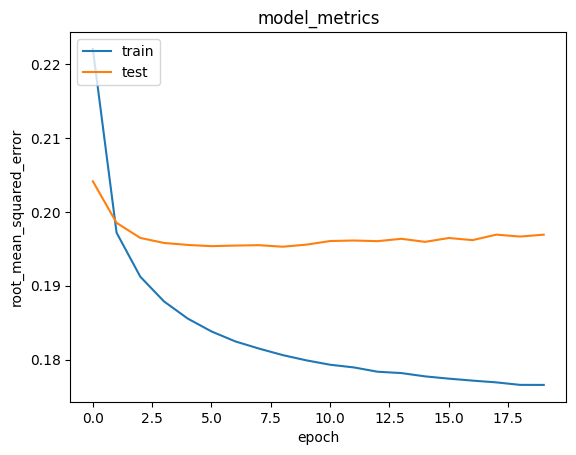

In [54]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Mendapatkan Rekomendasi

In [99]:
movies_df = movies
df = pd.read_csv('/content/movies-and-ratings-for-recommendation-system/ratings.csv')

# Mengambil sample user
user_id = df['userId'].sample(1).iloc[0]
movies_watched_by_user = df[df['userId'] == user_id]

# Mengambil data film yang belum ditonton user
movies_not_watched = movies_df[~movies_df['movieId'].isin(movies_watched_by_user.movieId.values)]['movieId']
movies_not_watched = list(
    set(movies_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)
movies_not_watched = [[movie_to_movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)

In [100]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Menampilkan rekomendasi

In [101]:
# Memprediksi rating
ratings = model.predict(user_movie_array).flatten()

# Mendapatkan top N rekomendasi
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

# Top 5 film yang ditonton user
top_movies_user = (
    movies_watched_by_user.sort_values(by='rating', ascending=False)
    .head(5).movieId.values
)
movie_df_rows = movies_df[movies_df['movieId'].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
  print(f"{row.title} (Genres: {row.genres})")

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movies = movies_df[movies_df['movieId'].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
  print(f"{row.title} (Genres: {row.genres})")

297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 520
Movie with high ratings from user
--------------------------------
Shawshank Redemption, The (1994) (Genres: Crime|Drama)
Hudsucker Proxy, The (1994) (Genres: Comedy)
Blade Runner (1982) (Genres: Action|Sci-Fi|Thriller)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) (Genres: Comedy|War)
Princess Bride, The (1987) (Genres: Action|Adventure|Comedy|Fantasy|Romance)
--------------------------------
Top 10 movie recommendation
--------------------------------
Philadelphia Story, The (1940) (Genres: Comedy|Drama|Romance)
Lawrence of Arabia (1962) (Genres: Adventure|Drama|War)
Third Man, The (1949) (Genres: Film-Noir|Mystery|Thriller)
Goodfellas (1990) (Genres: Crime|Drama)
Ran (1985) (Genres: Drama|War)
Godfather: Part II, The (1974) (Genres: Crime|Drama)
Grand Day Out with Wallace and Gromit, A (1989) (Genres: Adventure|Animation|Children|Comedy|Sci-Fi)
Amadeus (1984) (Genres: Drama)